# Predicting Who Survived the Sinking of Titanic
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

### 1. Problem Definition
What sorts of people were more likely to survive using passenger data (ie name, age, gender, socio-economic class, etc)

### 2. Data
https://www.kaggle.com/c/titanic/data

* titanic-train.csv: 12 columns and 891 rows
* titanic-test.csv: 11 columns (minus Survived column) and 418 rows

### 3. Evaluation
The evaluation metric is accuracy

### 4. Features
* PassengerId: passenger id
* Survived: survival. 0=no, 1=yes
* Pclass: ticket class. 1=1st(upper), 2=2nd(middle), 3=3rd(lower)
* Name: passenger name
* Sex: male or female
* Age: age in years
* Sibsp: # of siblings/spouses aboard the ship. Sibling=brother, sister, stepbrother, stepsister; spouse=husband or wife
* Parch: # of parents/children aboard the ship. Parent=father or mother; child=son, daughter, stepson, stepdaughter; parch=0 if children travelled with a nanny
* Ticket: ticket number
* Fare: passenger fare
* Cabin: cabin number
* Embarked: port of embarkation. C=cherbourg, Q=queenstown, S=southampton

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('viridis')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jafar-shodiq/mlearning-proj/main/project/who-survived-titanic/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

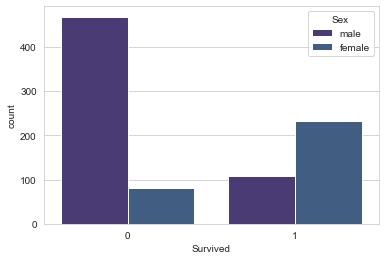

In [6]:
sns.countplot(x='Survived', data=data, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

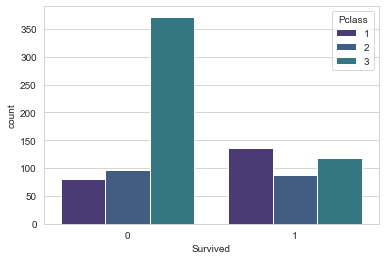

In [7]:
sns.countplot(x='Survived', data=data, hue='Pclass')

<AxesSubplot:xlabel='Survived', ylabel='count'>

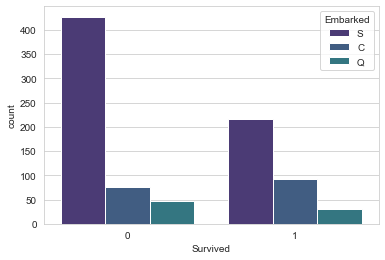

In [8]:
sns.countplot(x='Survived', data=data, hue='Embarked')

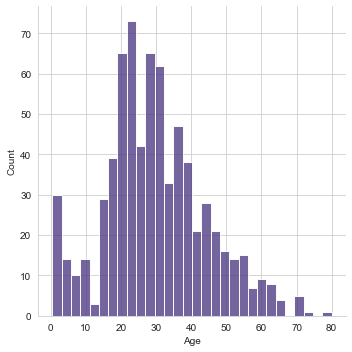

In [9]:
sns.displot(x='Age', data=data, bins=30)

## Dealing with missing data

In [10]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age**

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

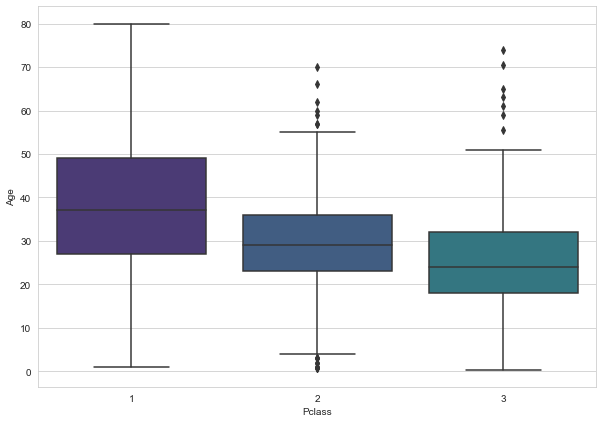

In [11]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass', y='Age', data=data)

Instead of just fill all of the the missing age with mean values, I can  fill them with mean values based of each passenger classes. Turns out that the 1st class passenger is slightly older than the 3rd class passenger, which makes sense. I will impute the null age based on passenger classes.

In [12]:
age1 = data['Age'][data['Pclass']==1].mean()
age2 = data['Age'][data['Pclass']==2].mean()
age3 = data['Age'][data['Pclass']==3].mean()
age1, age2, age3

(38.233440860215055, 29.87763005780347, 25.14061971830986)

In [13]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age

In [14]:
data['Age'] = data[['Age', 'Pclass']].apply(impute_age, axis=1)

In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The `Cabin` column has too many null values, so I might as well drop the column altogether 

In [16]:
data.drop('Cabin', axis=1, inplace=True)
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
data.dropna(inplace=True)
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Categorical features

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


I will need to convert `Sex` and `Embarked` columns into categorical. `Name` and `Ticket` columns are not really necessary for training process. In order to do that, I need to create dummy variables 

In [20]:
data['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [21]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
sex = pd.get_dummies(data['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [23]:
embark = pd.get_dummies(data['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Concat the new dummies into dataset

In [24]:
df = pd.concat([data, sex, embark], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


Now I can drop the other columns that I don't need

In [25]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    uint8  
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


<AxesSubplot:>

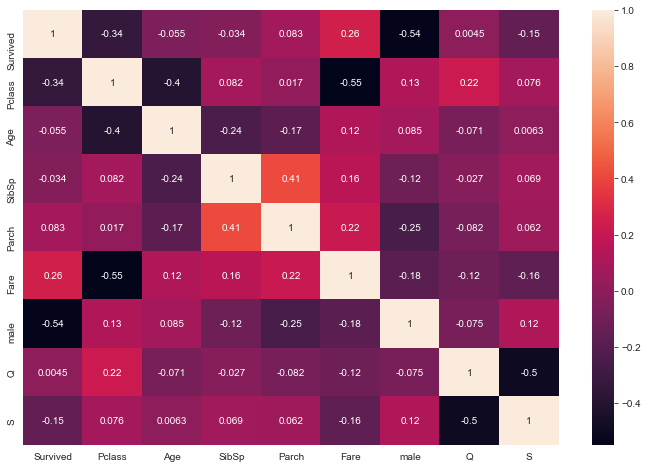

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

## Train the data

In [38]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
len(X_train), len(X_test)

(622, 267)

**Logistic regression**

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500)

In [40]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [41]:
prediction = log_reg.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       167
           1       0.72      0.75      0.74       100

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267

[[138  29]
 [ 25  75]]


In [58]:
# Save the model
import joblib

joblib.dump(log_reg, 'log-reg.joblib')

['log-reg.joblib']

## Test on brand new data

In [54]:
test = pd.read_csv('titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Dealing with missing data**

In [56]:
test.drop('Cabin', axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [53]:
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [59]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age

In [60]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis=1)
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [61]:
test.dropna(inplace=True)

In [62]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Categorical features**

In [69]:
sex = pd.get_dummies(test['Sex'], drop_first=True)
embark = pd.get_dummies(test['Embarked'], drop_first=True)

final_test = pd.concat([test, sex, embark], axis=1)

In [70]:
final_test.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
final_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [65]:
# Load the saved model
loaded_model = joblib.load('log-reg.joblib')

**Prediction**

In [75]:
predict = loaded_model.predict(final_test)

In [78]:
test['predicted'] = predict

In [79]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,predicted
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


In [82]:
test[test['predicted']==1][['Name', 'Pclass']]

,Name,Pclass
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3
6,"Connolly, Miss. Kate",3
8,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",3
12,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",1
14,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",1
...,...,...
409,"Peacock, Miss. Treasteall",3
410,"Naughton, Miss. Hannah",3
411,"Minahan, Mrs. William Edward (Lillian E Thorpe)",1
412,"Henriksson, Miss. Jenny Lovisa",3


<AxesSubplot:xlabel='predicted', ylabel='count'>

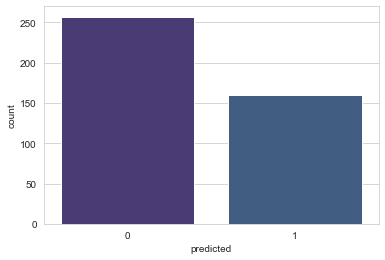

In [83]:
sns.countplot(x='predicted', data=test)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

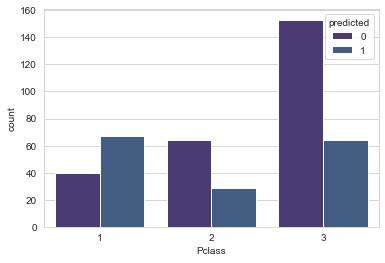

In [84]:
sns.countplot(x='Pclass', data=test, hue='predicted')

<AxesSubplot:xlabel='Sex', ylabel='count'>

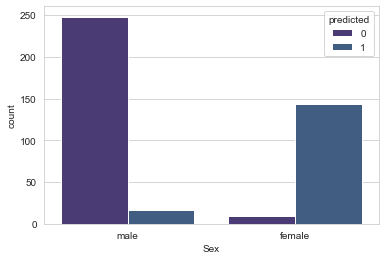

In [88]:
sns.countplot(x='Sex', data=test, hue='predicted')

<AxesSubplot:xlabel='Parch', ylabel='count'>

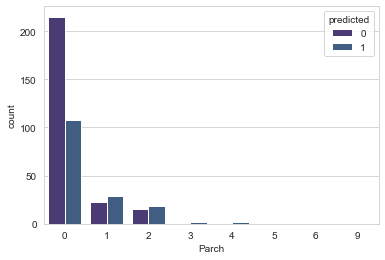

In [90]:
sns.countplot(x='Parch', data=test, hue='predicted')

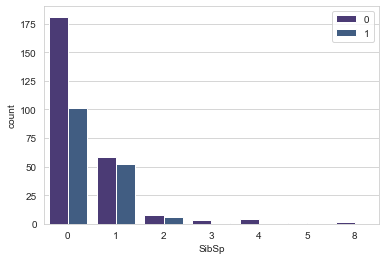

In [93]:
sns.countplot(x='SibSp', data=test, hue='predicted')
plt.legend(loc='upper right')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

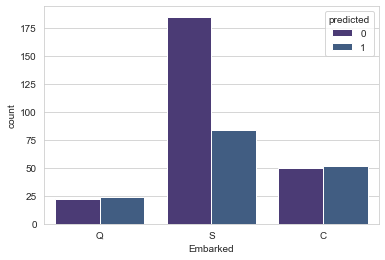

In [89]:
sns.countplot(x='Embarked', data=test, hue='predicted')

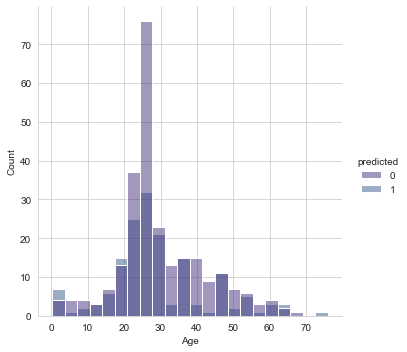

In [87]:
sns.displot(x='Age', data=test, hue='predicted')